# Proyek Analisis Data: [Input Nama Dataset]
- **Nama:** Arya Gunawan
- **Email:** aryakk008@gmail.com
- **ID Dicoding:** aryagunawan_12

## Menentukan Pertanyaan Bisnis

1. Bagaimana tren PM2.5 dan PM10 selama periode 2013-2017?
2. Bagaimana dampak tingkat polusi udara terhadap kondisi lingkungan?

## Import Semua Packages/Library yang Digunakan

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
import os

## Data Wrangling

### Gathering Data

In [6]:
df_Dingling = pd.read_csv("Dataset/PRSA_Data_Dingling_20130301-20170228.csv")

In [8]:
df_Dingling.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35064 entries, 0 to 35063
Data columns (total 18 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   No       35064 non-null  int64  
 1   year     35064 non-null  int64  
 2   month    35064 non-null  int64  
 3   day      35064 non-null  int64  
 4   hour     35064 non-null  int64  
 5   PM2.5    34285 non-null  float64
 6   PM10     34408 non-null  float64
 7   SO2      34334 non-null  float64
 8   NO2      33830 non-null  float64
 9   CO       33052 non-null  float64
 10  O3       33850 non-null  float64
 11  TEMP     35011 non-null  float64
 12  PRES     35014 non-null  float64
 13  DEWP     35011 non-null  float64
 14  RAIN     35013 non-null  float64
 15  wd       34924 non-null  object 
 16  WSPM     35021 non-null  float64
 17  station  35064 non-null  object 
dtypes: float64(11), int64(5), object(2)
memory usage: 4.8+ MB


In [10]:
df_Dingling.head()

No  year  month  day  hour  PM2.5  PM10  SO2  NO2     CO    O3  TEMP  \
0   1  2013      3    1     0    4.0   4.0  3.0  NaN  200.0  82.0  -2.3   
1   2  2013      3    1     1    7.0   7.0  3.0  NaN  200.0  80.0  -2.5   
2   3  2013      3    1     2    5.0   5.0  3.0  2.0  200.0  79.0  -3.0   
3   4  2013      3    1     3    6.0   6.0  3.0  NaN  200.0  79.0  -3.6   
4   5  2013      3    1     4    5.0   5.0  3.0  NaN  200.0  81.0  -3.5   

     PRES  DEWP  RAIN   wd  WSPM   station  
0  1020.8 -19.7   0.0    E   0.5  Dingling  
1  1021.3 -19.0   0.0  ENE   0.7  Dingling  
2  1021.3 -19.9   0.0  ENE   0.2  Dingling  
3  1021.8 -19.1   0.0  NNE   1.0  Dingling  
4  1022.3 -19.4   0.0    N   2.1  Dingling

In [12]:
df_Dingling.tail()

No  year  month  day  hour  PM2.5  PM10  SO2  NO2     CO     O3  \
35059  35060  2017      2   28    19   11.0  11.0  2.0  2.0  200.0   99.0   
35060  35061  2017      2   28    20   13.0  13.0  2.0  2.0  200.0  101.0   
35061  35062  2017      2   28    21    9.0  14.0  2.0  2.0  200.0  102.0   
35062  35063  2017      2   28    22   10.0  12.0  2.0  2.0  200.0   97.0   
35063  35064  2017      2   28    23   13.0  16.0  4.0  9.0  500.0   74.0   

       TEMP    PRES  DEWP  RAIN   wd  WSPM   station  
35059  11.7  1008.9 -13.3   0.0  NNE   1.3  Dingling  
35060  10.9  1009.0 -14.0   0.0    N   2.1  Dingling  
35061   9.5  1009.4 -13.0   0.0    N   1.5  Dingling  
35062   7.8  1009.6 -12.6   0.0   NW   1.4  Dingling  
35063   7.0  1009.4 -12.2   0.0    N   1.9  Dingling

**Insight:**
- Dataset memiliki 18 kolom dan 35.064 baris dengan berbagai jenis data (numerik & kategorikal)
- Kolom station hanya berisi satu nilai unik, yaitu "Dingling", sehingga tidak berkontribusi dalam analisis prediktif.

### Assessing Data

In [16]:
df_Dingling.head()

No  year  month  day  hour  PM2.5  PM10  SO2  NO2     CO    O3  TEMP  \
0   1  2013      3    1     0    4.0   4.0  3.0  NaN  200.0  82.0  -2.3   
1   2  2013      3    1     1    7.0   7.0  3.0  NaN  200.0  80.0  -2.5   
2   3  2013      3    1     2    5.0   5.0  3.0  2.0  200.0  79.0  -3.0   
3   4  2013      3    1     3    6.0   6.0  3.0  NaN  200.0  79.0  -3.6   
4   5  2013      3    1     4    5.0   5.0  3.0  NaN  200.0  81.0  -3.5   

     PRES  DEWP  RAIN   wd  WSPM   station  
0  1020.8 -19.7   0.0    E   0.5  Dingling  
1  1021.3 -19.0   0.0  ENE   0.7  Dingling  
2  1021.3 -19.9   0.0  ENE   0.2  Dingling  
3  1021.8 -19.1   0.0  NNE   1.0  Dingling  
4  1022.3 -19.4   0.0    N   2.1  Dingling

In [18]:
df_Dingling.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35064 entries, 0 to 35063
Data columns (total 18 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   No       35064 non-null  int64  
 1   year     35064 non-null  int64  
 2   month    35064 non-null  int64  
 3   day      35064 non-null  int64  
 4   hour     35064 non-null  int64  
 5   PM2.5    34285 non-null  float64
 6   PM10     34408 non-null  float64
 7   SO2      34334 non-null  float64
 8   NO2      33830 non-null  float64
 9   CO       33052 non-null  float64
 10  O3       33850 non-null  float64
 11  TEMP     35011 non-null  float64
 12  PRES     35014 non-null  float64
 13  DEWP     35011 non-null  float64
 14  RAIN     35013 non-null  float64
 15  wd       34924 non-null  object 
 16  WSPM     35021 non-null  float64
 17  station  35064 non-null  object 
dtypes: float64(11), int64(5), object(2)
memory usage: 4.8+ MB


**Insight:**
- Dataset `df_Dingling` berisi 35,064 entri dengan 18 kolom yang mencakup parameter kualitas udara dan kondisi cuaca. Terlihat bahwa beberapa parameter utama kualitas udara memiliki data kosong, ditandai dengan jumlah entri yang lebih sedikit dibandingkan total baris indeks. Untuk mengetahui jumlah data yang hilang secara lebih jelas, dapat digunakan fungsi `isna().sum()`.

In [21]:
df_Dingling.isna().sum()

No            0
year          0
month         0
day           0
hour          0
PM2.5       779
PM10        656
SO2         730
NO2        1234
CO         2012
O3         1214
TEMP         53
PRES         50
DEWP         53
RAIN         51
wd          140
WSPM         43
station       0
dtype: int64

**insight**
- Setelah mengetahui jumlah data yang hilang, langkah berikutnya adalah memeriksa adanya duplikasi data menggunakan fungsi `duplicated().sum()`.

In [24]:
df_Dingling.duplicated().sum()

0

**insight**
- Dataframe ini tidak mengandung duplikasi. Selanjutnya, kita akan menganalisis anomali data dengan melihat parameter statistiknya menggunakan fungsi `describe()`

In [27]:
df_Dingling.describe()

No          year         month           day          hour  \
count  35064.000000  35064.000000  35064.000000  35064.000000  35064.000000   
mean   17532.500000   2014.662560      6.522930     15.729637     11.500000   
std    10122.249256      1.177213      3.448752      8.800218      6.922285   
min        1.000000   2013.000000      1.000000      1.000000      0.000000   
25%     8766.750000   2014.000000      4.000000      8.000000      5.750000   
50%    17532.500000   2015.000000      7.000000     16.000000     11.500000   
75%    26298.250000   2016.000000     10.000000     23.000000     17.250000   
max    35064.000000   2017.000000     12.000000     31.000000     23.000000   

              PM2.5          PM10           SO2           NO2            CO  \
count  34285.000000  34408.000000  34334.000000  33830.000000  33052.000000   
mean      65.989497     83.739723     11.749650     27.585467    904.896073   
std       72.267723     79.541685     15.519259     26.383882    903.306220   
min        3.000000      2.000000      0.285600      1.026500    100.000000   
25%       14.000000     26.000000      2.000000      9.000000    300.000000   
50%       41.000000     60.000000      5.000000     19.000000    600.000000   
75%       93.000000    117.000000     15.000000     38.000000   1200.000000   
max      881.000000    905.000000    156.000000    205.000000  10000.000000   

                 O3          TEMP          PRES          DEWP          RAIN  \
count  33850.000000  35011.000000  35014.000000  35011.000000  35013.000000   
mean      68.548371     13.686111   1007.760278      1.505495      0.060366   
std       53.764424     11.365313     10.225664     13.822099      0.752899   
min        0.214200    -16.600000    982.400000    -35.100000      0.000000   
25%       31.000000      3.400000    999.300000    -10.200000      0.000000   
50%       61.000000     14.700000   1007.400000      1.800000      0.000000   
75%       90.000000     23.300000   1016.000000     14.200000      0.000000   
max      500.000000     41.400000   1036.500000     27.200000     52.100000   

               WSPM  
count  35021.000000  
mean       1.853836  
std        1.309808  
min        0.000000  
25%        1.000000  
50%        1.500000  
75%        2.300000  
max       10.000000

**insight**
- Asesmen data dari Stasiun Dingling (DLG) menunjukkan bahwa dataframe memiliki 17 kolom dengan total 35.064 baris
- Beberapa kolom parameter utama kualitas udara mengandung data kosong yang perlu diimputasi pada tahap berikutnya. Selain itu, tidak ditemukan anomali dalam struktur, tipe data, maupun nilai yang ada.

### Cleaning Data

In [31]:
df_Dingling.isna().sum()

No            0
year          0
month         0
day           0
hour          0
PM2.5       779
PM10        656
SO2         730
NO2        1234
CO         2012
O3         1214
TEMP         53
PRES         50
DEWP         53
RAIN         51
wd          140
WSPM         43
station       0
dtype: int64

imputasi pada kolom PM2.5, PM10, SO2, NO2, CO, O3, TEMP, PRES, DEWP, RAIN, WSPM, dan wd. Imputasi akan dilakukan dengan metode interpolasi untuk mengisi data yang kosong berdasarkan data-data lain yang terisi sehingga nilainya tetap representatif dan tidak menimbulkan anomali. Khusus untuk parameter wd, imputasi dilakukan dengan menginputkan nilai mayoritas karena bukan merupakan nilai numerik, sehingga tidak bisa dilakukan interpolasi

In [34]:
miss_val = ['PM2.5','PM10','SO2','NO2','CO','O3','TEMP','PRES','DEWP','RAIN','WSPM']

for i in miss_val:
  df_Dingling[i] = df_Dingling[i].interpolate(method='linear')

df_Dingling.isna().sum()

No           0
year         0
month        0
day          0
hour         0
PM2.5        0
PM10         0
SO2          0
NO2          2
CO           0
O3           0
TEMP         0
PRES         0
DEWP         0
RAIN         0
wd         140
WSPM         0
station      0
dtype: int64

masih terdapat data NO2 yang kosong dan tidak dapat terisi dengan metode interpolasi linier. Dikarenakan interpolasi linier mengisi data yang kosong berdasarkan isian data sebelumnya. Karena kolom yang kosong terdapat pada urutan awal, maka kolom tersebut tidak dapat diisi dengan metode interpolasi segingga tetap kosong nilainya.

In [37]:

df_Dingling[df_Dingling['NO2'].isna()]

No  year  month  day  hour  PM2.5  PM10  SO2  NO2     CO    O3  TEMP  \
0   1  2013      3    1     0    4.0   4.0  3.0  NaN  200.0  82.0  -2.3   
1   2  2013      3    1     1    7.0   7.0  3.0  NaN  200.0  80.0  -2.5   

     PRES  DEWP  RAIN   wd  WSPM   station  
0  1020.8 -19.7   0.0    E   0.5  Dingling  
1  1021.3 -19.0   0.0  ENE   0.7  Dingling

Untuk mengatasi hal ini digunakan metode `bfill`

In [40]:
df_Dingling['NO2'].fillna(method='bfill', inplace=True)

C:\Users\aryag\AppData\Local\Temp\ipykernel_10884\2455728913.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_Dingling['NO2'].fillna(method='bfill', inplace=True)
C:\Users\aryag\AppData\Local\Temp\ipykernel_10884\2455728913.py:1: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df_Dingling['NO2'].fillna(method='bfill', inplace=True)


In [42]:
df_Dingling.isna().sum()

No           0
year         0
month        0
day          0
hour         0
PM2.5        0
PM10         0
SO2          0
NO2          0
CO           0
O3           0
TEMP         0
PRES         0
DEWP         0
RAIN         0
wd         140
WSPM         0
station      0
dtype: int64

Sekarang data NO2 telah terisi semua. Selanjutnya tinggal melakukan imputasi terhadap `wd`

In [45]:
df_Dingling.wd.fillna(df_Dingling.wd.mode()[0], inplace=True)
df_Dingling.isna().sum()

C:\Users\aryag\AppData\Local\Temp\ipykernel_10884\3183806091.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_Dingling.wd.fillna(df_Dingling.wd.mode()[0], inplace=True)


No         0
year       0
month      0
day        0
hour       0
PM2.5      0
PM10       0
SO2        0
NO2        0
CO         0
O3         0
TEMP       0
PRES       0
DEWP       0
RAIN       0
wd         0
WSPM       0
station    0
dtype: int64

In [47]:
df_Dingling.describe()

No          year         month           day          hour  \
count  35064.000000  35064.000000  35064.000000  35064.000000  35064.000000   
mean   17532.500000   2014.662560      6.522930     15.729637     11.500000   
std    10122.249256      1.177213      3.448752      8.800218      6.922285   
min        1.000000   2013.000000      1.000000      1.000000      0.000000   
25%     8766.750000   2014.000000      4.000000      8.000000      5.750000   
50%    17532.500000   2015.000000      7.000000     16.000000     11.500000   
75%    26298.250000   2016.000000     10.000000     23.000000     17.250000   
max    35064.000000   2017.000000     12.000000     31.000000     23.000000   

              PM2.5          PM10           SO2           NO2            CO  \
count  35064.000000  35064.000000  35064.000000  35064.000000  35064.000000   
mean      66.845557     84.113713     11.797849     27.303589    925.111838   
std       73.445093     80.242081     15.652372     26.296835    894.687311   
min        3.000000      2.000000      0.285600      1.026500    100.000000   
25%       14.000000     26.000000      2.000000      8.000000    300.000000   
50%       41.000000     60.000000      5.000000     19.000000    600.000000   
75%       94.000000    118.000000     15.000000     37.176157   1200.000000   
max      881.000000    905.000000    156.000000    205.000000  10000.000000   

                 O3          TEMP          PRES          DEWP          RAIN  \
count  35064.000000  35064.000000  35064.000000  35064.000000  35064.000000   
mean      70.530792     13.671605   1007.771151      1.486924      0.060293   
std       58.624617     11.367457     10.226075     13.828895      0.752357   
min        0.214200    -16.600000    982.400000    -35.100000      0.000000   
25%       31.000000      3.400000    999.300000    -10.300000      0.000000   
50%       62.000000     14.600000   1007.400000      1.700000      0.000000   
75%       91.000000     23.300000   1016.000000     14.200000      0.000000   
max      500.000000     41.400000   1036.500000     27.200000     52.100000   

               WSPM  
count  35064.000000  
mean       1.854871  
std        1.310748  
min        0.000000  
25%        1.000000  
50%        1.500000  
75%        2.300000  
max       10.000000

**insight**
- Imputasi dengan metode interpolasi berhasil dilakukan dan tidak menimbulkan anomali pada parameter statistiknya
- Kolom wd diimputasi dengan modus karena tidak dapat diinterpolasi

## Exploratory Data Analysis (EDA)

### Explore rata-rata jumlah polutan pada setiap daerah selama tahun 2013-2017

C:\Users\aryag\AppData\Local\Temp\ipykernel_10884\190390804.py:5: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df_Dingling.fillna(method='bfill', inplace=True)


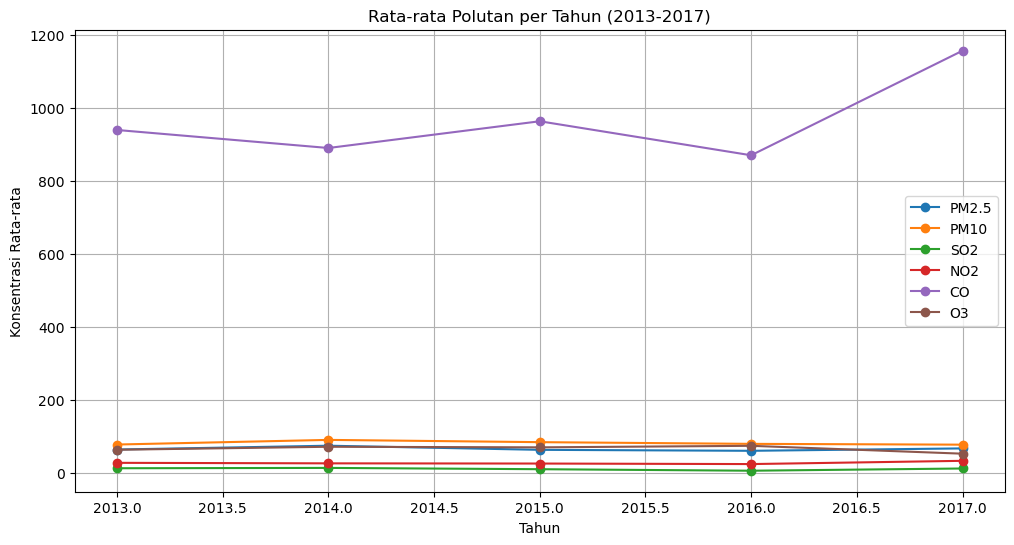

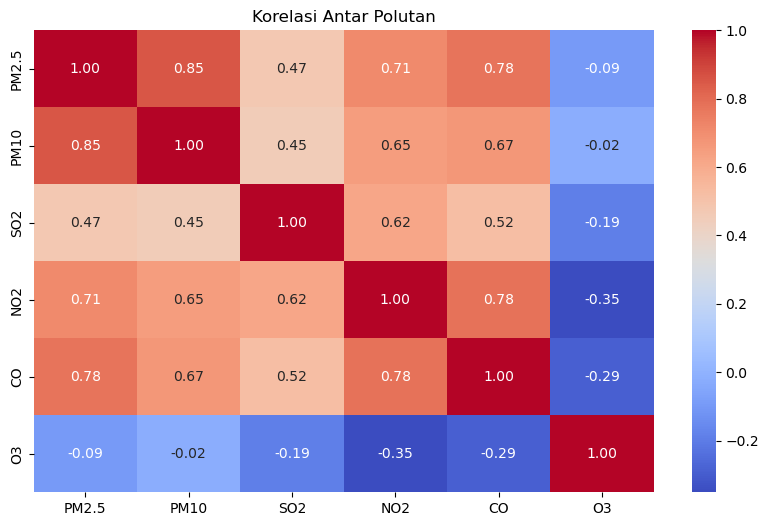

<Figure size 1200x800 with 0 Axes>

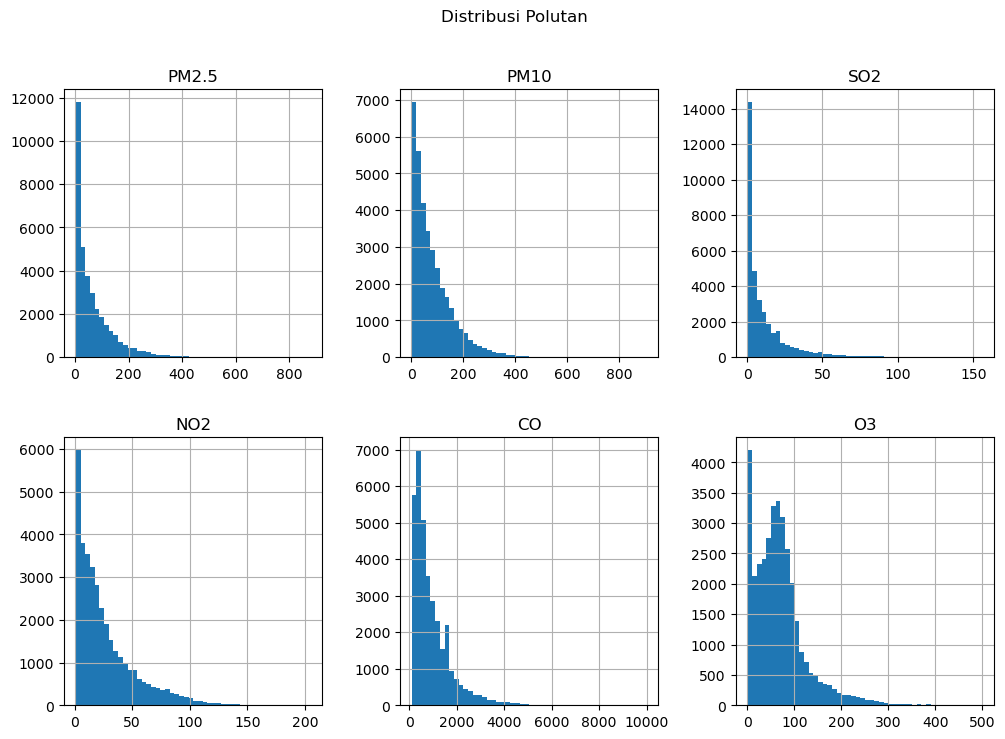

          PM2.5       PM10        SO2        NO2           CO         O3
year                                                                    
2013  65.200980  78.884940  13.955578  28.768839   940.035607  64.549386
2014  75.643006  91.554865  14.872983  27.365046   890.734399  72.762681
2015  64.353124  85.374616  11.322508  26.821221   963.934551  71.166486
2016  61.701218  80.707707   7.166041  25.375114   870.810565  75.364925
2017  68.281780  78.526483  13.256356  34.271186  1157.062147  53.824859


In [52]:
# Mengisi missing values
polutant_cols = ['PM2.5', 'PM10', 'SO2', 'NO2', 'CO', 'O3']
for col in polutant_cols:
    df_Dingling[col] = df_Dingling[col].interpolate(method='linear')
df_Dingling.fillna(method='bfill', inplace=True)

# Grouping data berdasarkan tahun
pollutant_means = df_Dingling.groupby('year')[polutant_cols].mean()

# Visualisasi
plt.figure(figsize=(12, 6))
for col in polutant_cols:
    plt.plot(pollutant_means.index, pollutant_means[col], marker='o', label=col)

plt.title('Rata-rata Polutan per Tahun (2013-2017)')
plt.xlabel('Tahun')
plt.ylabel('Konsentrasi Rata-rata')
plt.legend()
plt.grid()
plt.show()

# Heatmap untuk korelasi antara polutan
plt.figure(figsize=(10, 6))
sns.heatmap(df_Dingling[polutant_cols].corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Korelasi Antar Polutan')
plt.show()

# Distribusi masing-masing polutan
plt.figure(figsize=(12, 8))
df_Dingling[polutant_cols].hist(bins=50, figsize=(12, 8), layout=(2, 3))
plt.suptitle('Distribusi Polutan')
plt.show()

# Menampilkan data rata-rata per tahun
print(pollutant_means)

**Insight:**
- Tahun 2014 adalah tahun dengan polusi tertinggi untuk sebagian besar polutan (PM2.5, PM10, SO2), menunjukkan bahwa tahun tersebut mungkin dipengaruhi oleh faktor-faktor seperti kondisi cuaca atau peningkatan aktivitas industri.
- Tahun 2016 adalah tahun dengan polusi terendah untuk sebagian besar polutan, menunjukkan bahwa upaya pengendalian polusi mungkin efektif pada tahun tersebut.
- Tahun 2017 menunjukkan peningkatan kembali untuk beberapa polutan (NO2, CO), mengindikasikan bahwa polusi udara masih menjadi masalah yang perlu diperhatikan.
- Korelasi antar polutan membantu mengidentifikasi sumber emisi yang mungkin sama, seperti emisi kendaraan atau industri.
- Distribusi polutan menunjukkan bahwa meskipun sebagian besar waktu kualitas udara baik, terdapat beberapa kejadian polusi tinggi yang perlu diwaspadai.

## Visualization & Explanatory Analysis

### Pertanyaan 1: Bagaimana tren PM2.5 dan PM10 selama periode 2013-2017?

Mengelompokkan data berdasarkan tahun dan menghitung rata-rata konsentrasi PM2.5 dan PM10 untuk setiap tahun.

In [58]:
# Menghitung rata-rata PM2.5 dan PM10 per tahun
pm_trend = df_Dingling.groupby('year')[['PM2.5', 'PM10']].mean()
print(pm_trend)

          PM2.5       PM10
year                      
2013  65.200980  78.884940
2014  75.643006  91.554865
2015  64.353124  85.374616
2016  61.701218  80.707707
2017  68.281780  78.526483


memvisualisasikan tren PM2.5 dan PM10 menggunakan grafik garis untuk melihat pola perubahan dari tahun 2013 hingga 2017.

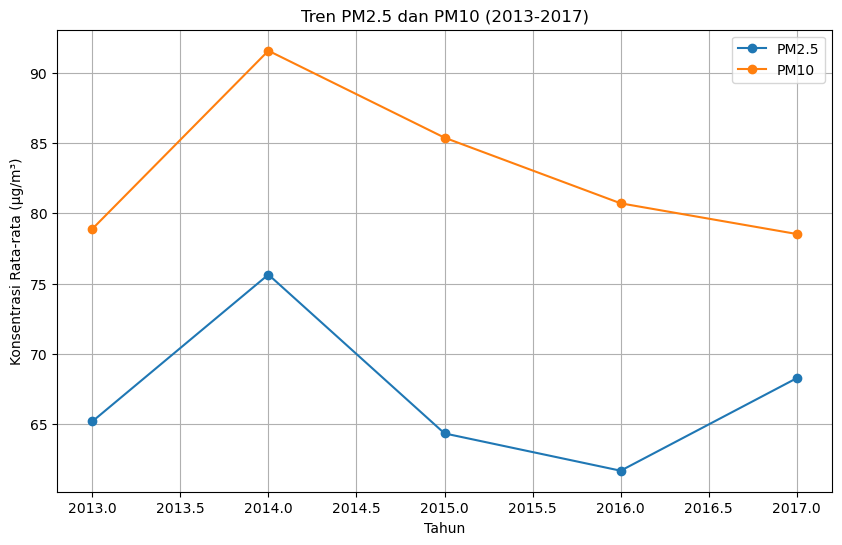

In [61]:
# Visualisasi tren PM2.5 dan PM10
plt.figure(figsize=(10, 6))
plt.plot(pm_trend.index, pm_trend['PM2.5'], marker='o', label='PM2.5')
plt.plot(pm_trend.index, pm_trend['PM10'], marker='o', label='PM10')

# Menambahkan judul dan label
plt.title('Tren PM2.5 dan PM10 (2013-2017)')
plt.xlabel('Tahun')
plt.ylabel('Konsentrasi Rata-rata (µg/m³)')
plt.legend()
plt.grid()
plt.show()

In [63]:
# Menghitung korelasi antara PM2.5 dan PM10
correlation = df_Dingling['PM2.5'].corr(df_Dingling['PM10'])
print(f"Korelasi antara PM2.5 dan PM10: {correlation:.2f}")

Korelasi antara PM2.5 dan PM10: 0.85


**insight**
- Korelasi antara PM2.5 dan PM10 biasanya tinggi karena kedua polutan tersebut berasal dari sumber yang serupa, seperti emisi kendaraan dan industri.

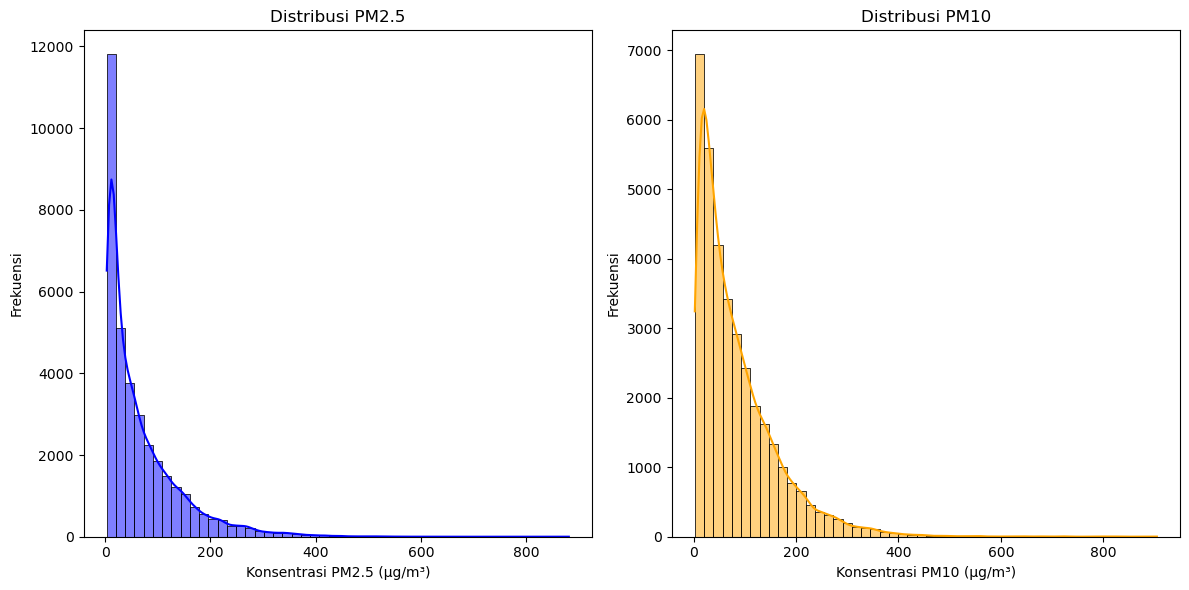

In [66]:
# Visualisasi distribusi PM2.5 dan PM10
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
sns.histplot(df_Dingling['PM2.5'], bins=50, kde=True, color='blue')
plt.title('Distribusi PM2.5')
plt.xlabel('Konsentrasi PM2.5 (µg/m³)')
plt.ylabel('Frekuensi')

plt.subplot(1, 2, 2)
sns.histplot(df_Dingling['PM10'], bins=50, kde=True, color='orange')
plt.title('Distribusi PM10')
plt.xlabel('Konsentrasi PM10 (µg/m³)')
plt.ylabel('Frekuensi')

plt.tight_layout()
plt.show()

Distribusi PM2.5 dan PM10 cenderung miring ke kanan (right-skewed), menunjukkan bahwa sebagian besar konsentrasi berada pada tingkat rendah, tetapi terdapat beberapa nilai ekstrem yang tinggi.

**insight**
- Tren PM2.5 dan PM10 menunjukkan fluktuasi selama periode 2013-2017, dengan puncak tertinggi pada tahun 2014.
- Korelasi antara PM2.5 dan PM10 sangat kuat, menunjukkan bahwa kedua polutan tersebut mungkin berasal dari sumber yang serupa.
- Distribusi konsentrasi PM2.5 dan PM10 menunjukkan adanya beberapa nilai ekstrem yang tinggi, yang dapat menjadi indikator hari dengan polusi udara yang sangat buruk.

### Pertanyaan 2: Bagaimana dampak tingkat polusi udara terhadap kondisi lingkungan?

Menghitung korelasi antara polutan udara (PM2.5, PM10, SO2, NO2, CO, O3) dengan parameter lingkungan (TEMP, DEWP, PRES, RAIN) untuk memahami hubungannya

          PM2.5      PM10       SO2       NO2        CO        O3      TEMP  \
PM2.5  1.000000  0.854997  0.474260  0.714036  0.775850 -0.094578 -0.088894   
PM10   0.854997  1.000000  0.453541  0.649564  0.668470 -0.020403 -0.055543   
SO2    0.474260  0.453541  1.000000  0.615631  0.521328 -0.187935 -0.316122   
NO2    0.714036  0.649564  0.615631  1.000000  0.781272 -0.350872 -0.309315   
CO     0.775850  0.668470  0.521328  0.781272  1.000000 -0.291617 -0.281221   
O3    -0.094578 -0.020403 -0.187935 -0.350872 -0.291617  1.000000  0.575507   
TEMP  -0.088894 -0.055543 -0.316122 -0.309315 -0.281221  0.575507  1.000000   
DEWP   0.135109  0.060597 -0.285467 -0.097072 -0.030329  0.329824  0.823871   
PRES  -0.005834 -0.039328  0.246140  0.195987  0.179596 -0.448177 -0.837857   
RAIN  -0.008102 -0.021639 -0.039560 -0.031161 -0.004450  0.025165  0.035224   

           DEWP      PRES      RAIN  
PM2.5  0.135109 -0.005834 -0.008102  
PM10   0.060597 -0.039328 -0.021639  
SO2   -0.285467 

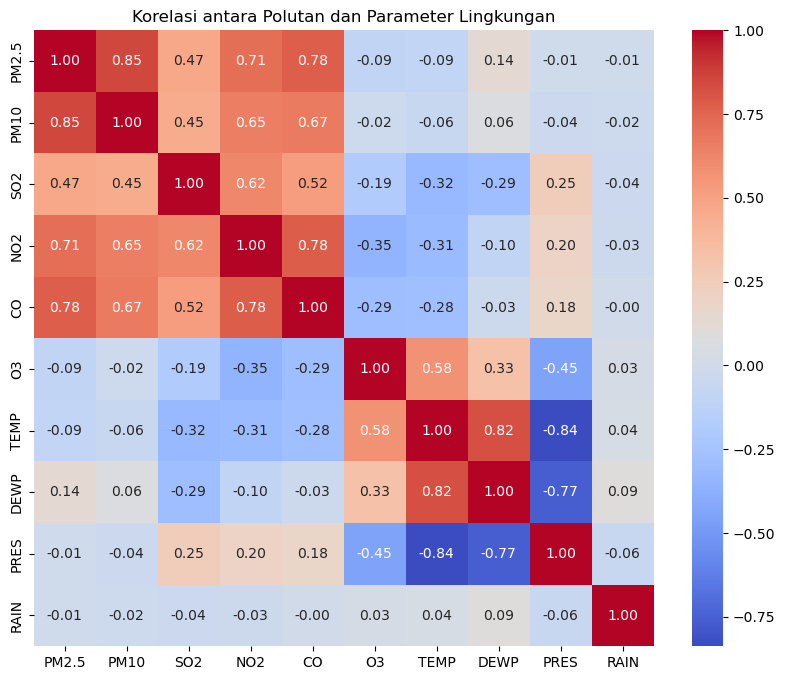

In [72]:
# Menghitung korelasi antara polutan dan parameter lingkungan
environmental_params = ['TEMP', 'DEWP', 'PRES', 'RAIN']
pollutants = ['PM2.5', 'PM10', 'SO2', 'NO2', 'CO', 'O3']

correlation_matrix = df_Dingling[pollutants + environmental_params].corr()
print(correlation_matrix)

# Visualisasi heatmap korelasi
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Korelasi antara Polutan dan Parameter Lingkungan')
plt.show()

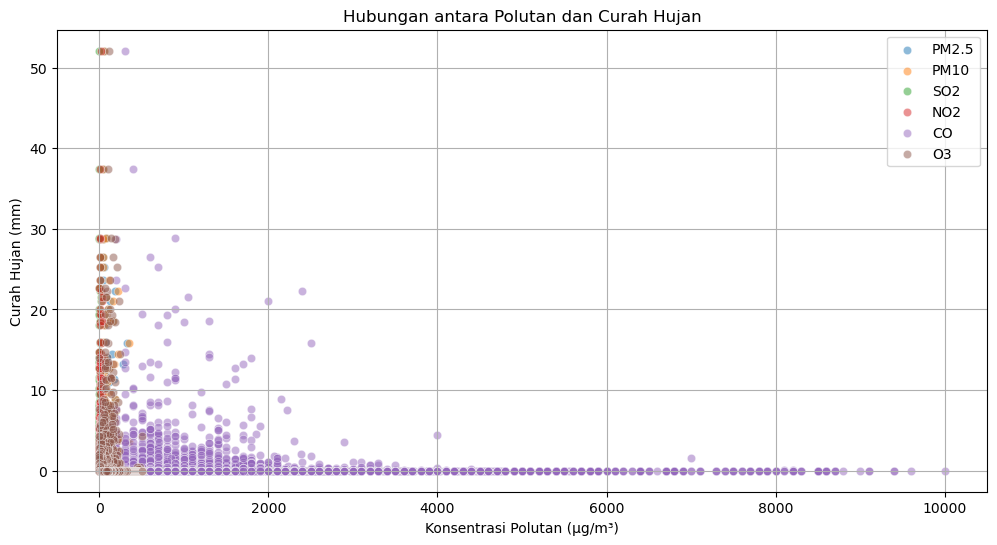

In [74]:
# Visualisasi hubungan antara polutan dan curah hujan
plt.figure(figsize=(12, 6))
for pollutant in pollutants:
    sns.scatterplot(x=df_Dingling[pollutant], y=df_Dingling['RAIN'], alpha=0.5, label=pollutant)
plt.title('Hubungan antara Polutan dan Curah Hujan')
plt.xlabel('Konsentrasi Polutan (µg/m³)')
plt.ylabel('Curah Hujan (mm)')
plt.legend()
plt.grid()
plt.show()

**Insight:**
- Jika terdapat pola tertentu (misalnya, peningkatan polutan diikuti oleh peningkatan atau penurunan curah hujan), hal ini dapat mengindikasikan dampak polusi udara terhadap presipitasi.

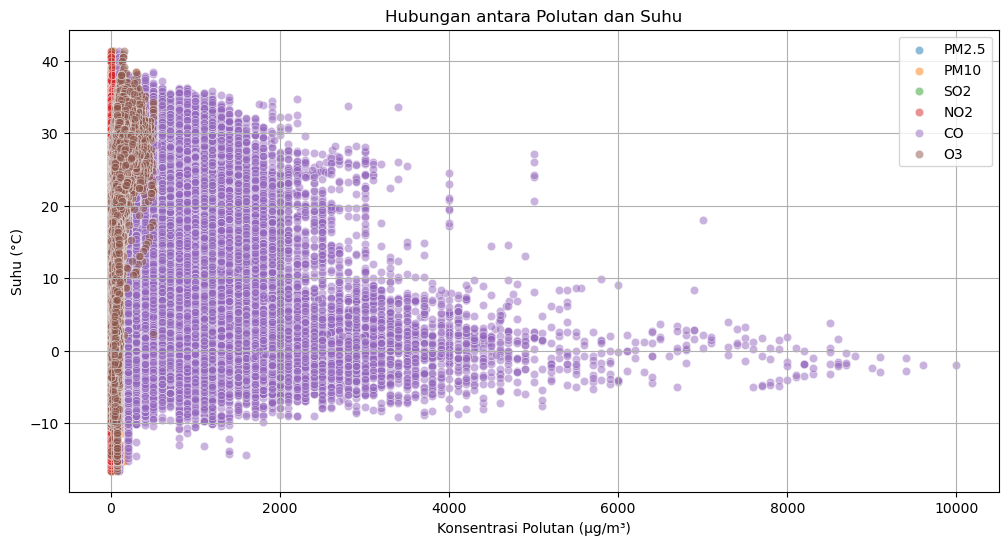

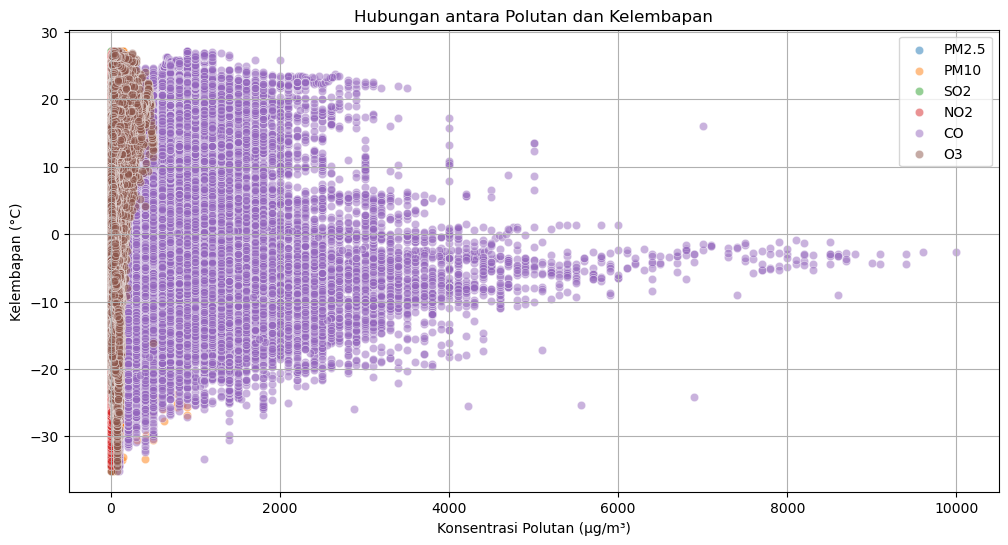

In [77]:
# Visualisasi hubungan antara polutan dan suhu
plt.figure(figsize=(12, 6))
for pollutant in pollutants:
    sns.scatterplot(x=df_Dingling[pollutant], y=df_Dingling['TEMP'], alpha=0.5, label=pollutant)
plt.title('Hubungan antara Polutan dan Suhu')
plt.xlabel('Konsentrasi Polutan (µg/m³)')
plt.ylabel('Suhu (°C)')
plt.legend()
plt.grid()
plt.show()

# Visualisasi hubungan antara polutan dan kelembapan
plt.figure(figsize=(12, 6))
for pollutant in pollutants:
    sns.scatterplot(x=df_Dingling[pollutant], y=df_Dingling['DEWP'], alpha=0.5, label=pollutant)
plt.title('Hubungan antara Polutan dan Kelembapan')
plt.xlabel('Konsentrasi Polutan (µg/m³)')
plt.ylabel('Kelembapan (°C)')
plt.legend()
plt.grid()
plt.show()

**Insight**
- Polutan seperti PM2.5 dan PM10 dapat menyebabkan penurunan suhu karena partikulat menghalangi radiasi matahari.
- Kelembapan yang tinggi dapat meningkatkan konsentrasi polutan karena partikulat cenderung menyerap uap air.

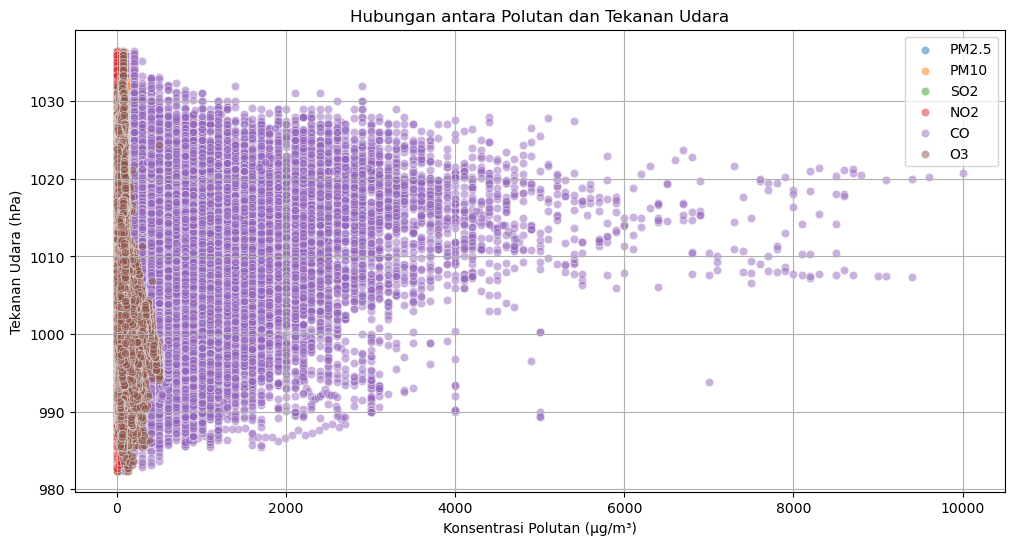

In [80]:
# Visualisasi hubungan antara polutan dan tekanan udara
plt.figure(figsize=(12, 6))
for pollutant in pollutants:
    sns.scatterplot(x=df_Dingling[pollutant], y=df_Dingling['PRES'], alpha=0.5, label=pollutant)
plt.title('Hubungan antara Polutan dan Tekanan Udara')
plt.xlabel('Konsentrasi Polutan (µg/m³)')
plt.ylabel('Tekanan Udara (hPa)')
plt.legend()
plt.grid()
plt.show()

**Insight**
- Polutan dapat memengaruhi tekanan udara secara tidak langsung melalui perubahan suhu dan kelembapan.

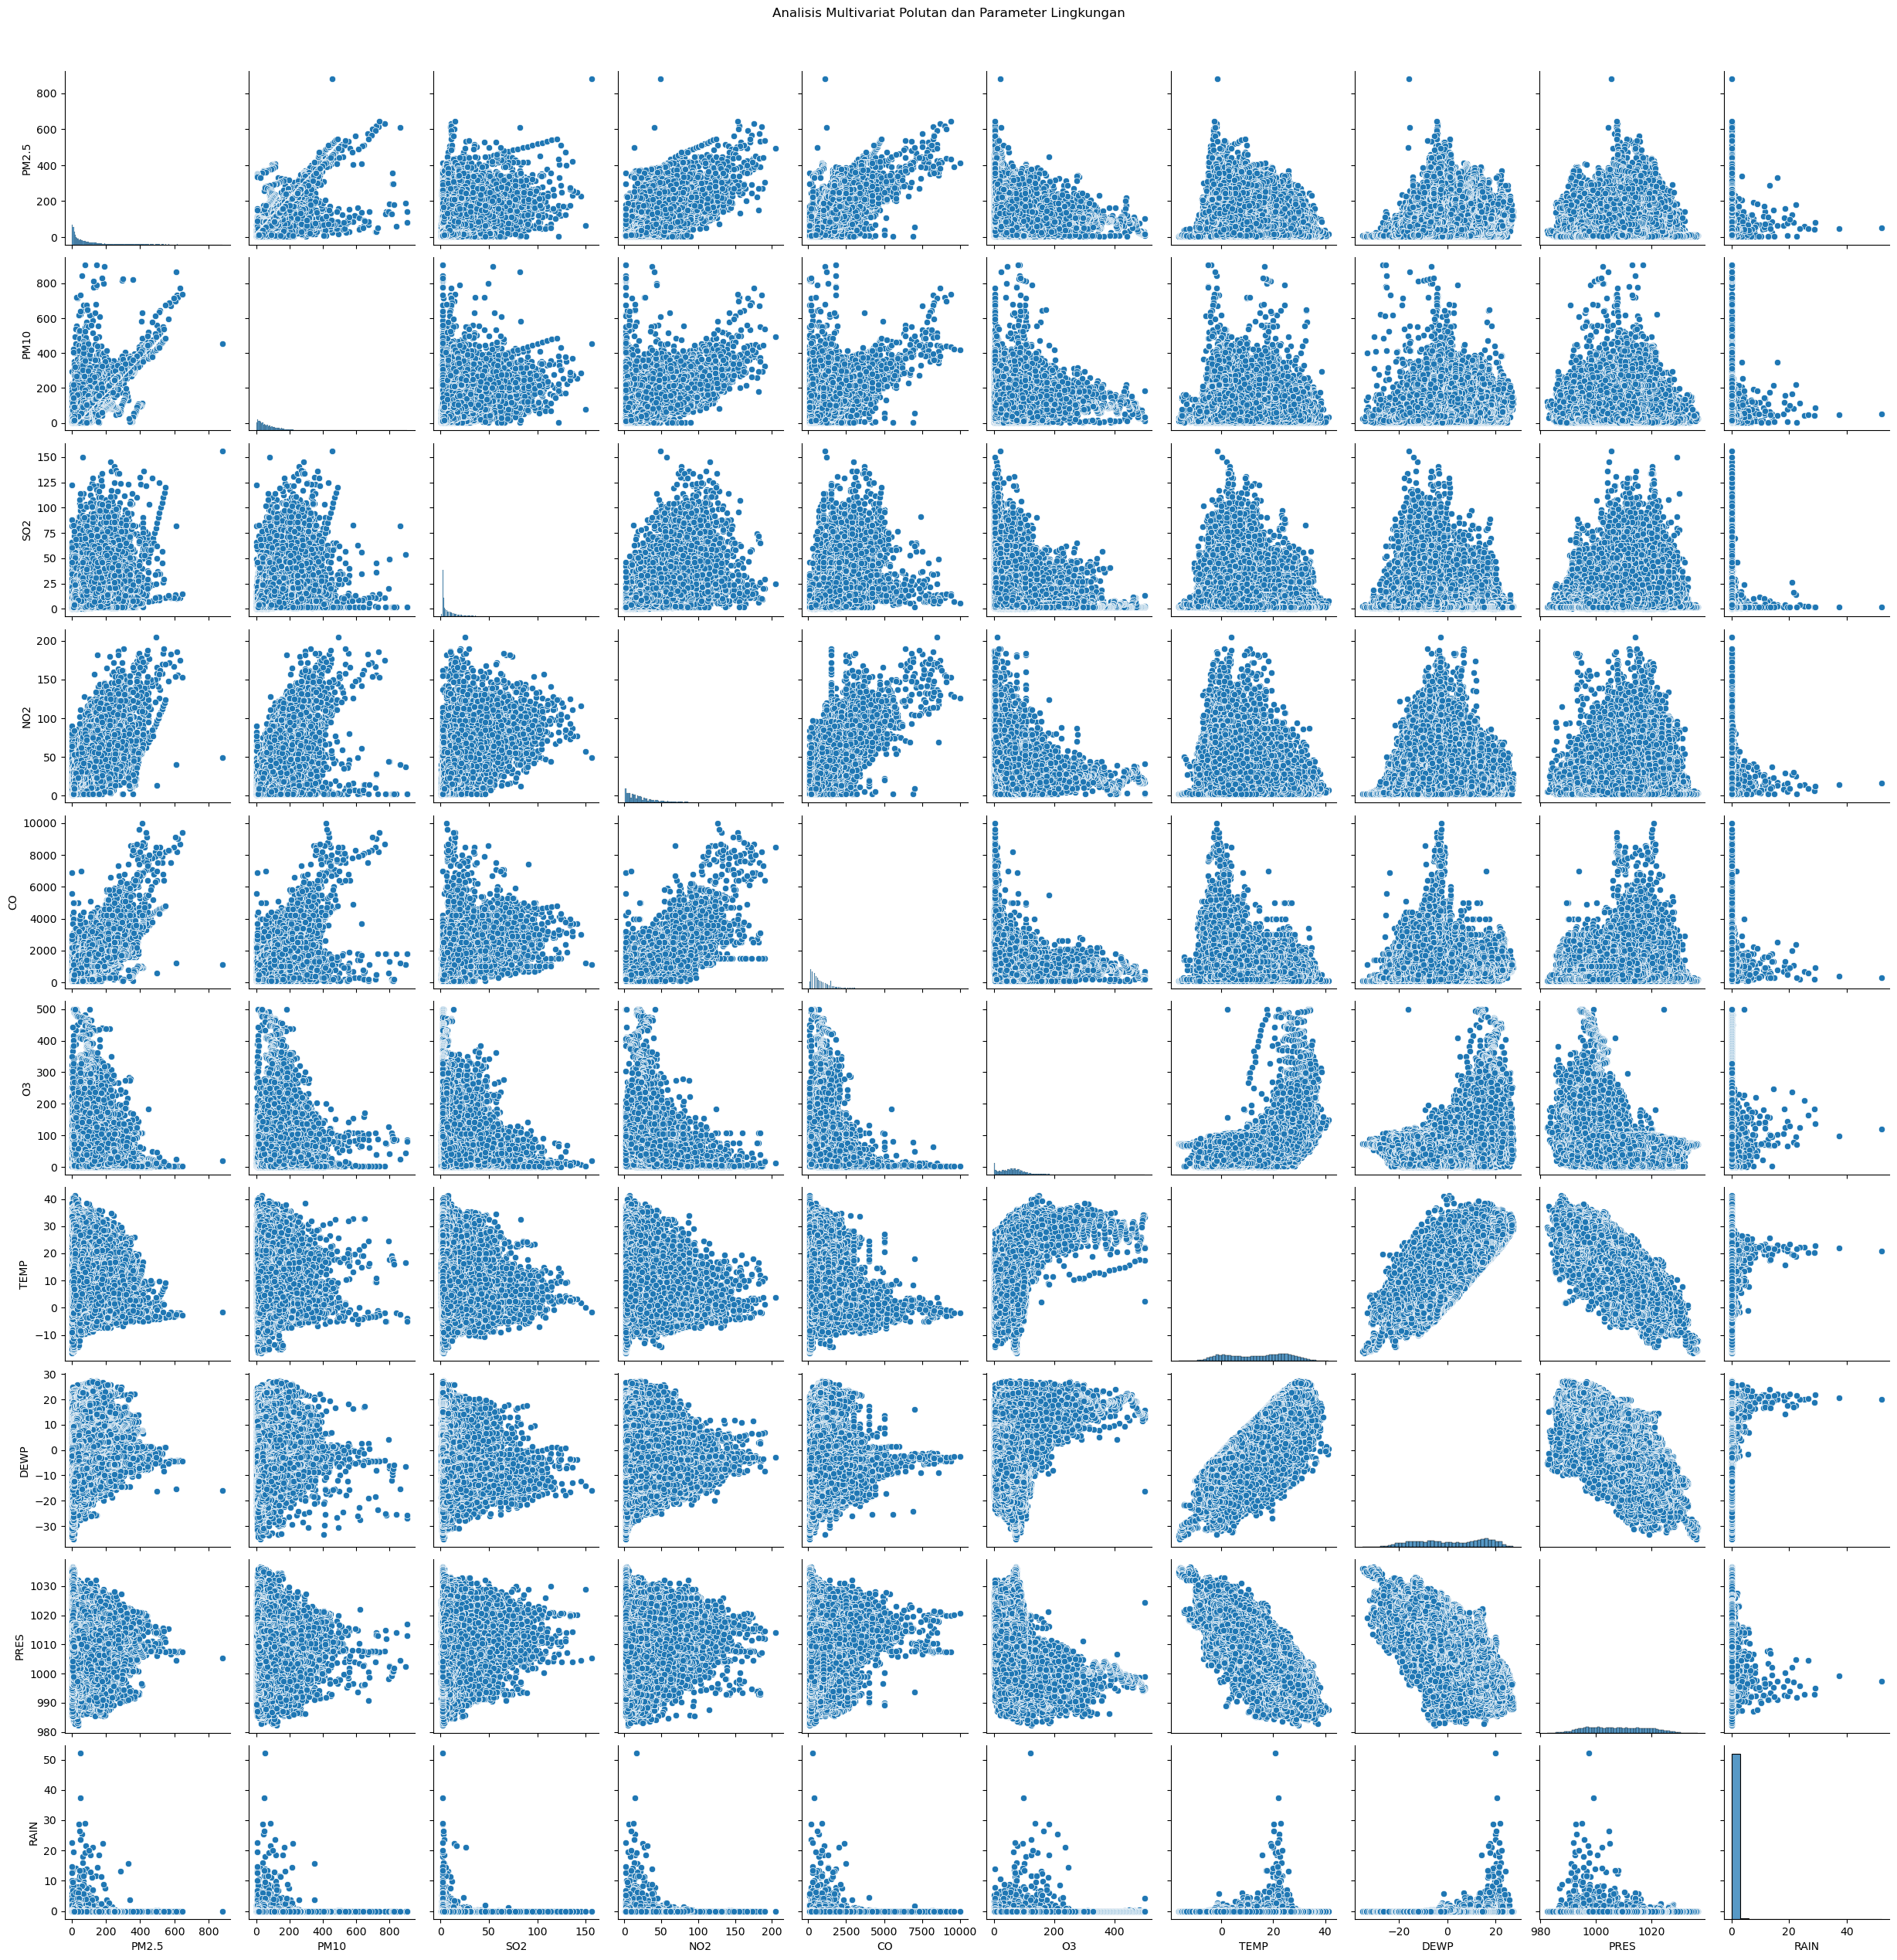

In [83]:
# Analisis multivariat menggunakan pairplot
sns.pairplot(df_Dingling[['PM2.5', 'PM10', 'SO2', 'NO2', 'CO', 'O3', 'TEMP', 'DEWP', 'PRES', 'RAIN']])
plt.suptitle('Analisis Multivariat Polutan dan Parameter Lingkungan', y=1.02)
plt.show()

**Insight**

1 Dampak terhadap Curah Hujan:
- Polusi partikulat (PM2.5 dan PM10) dapat memengaruhi pembentukan awan dan curah hujan. 
- Partikulat bertindak sebagai inti kondensasi awan, yang dapat meningkatkan atau mengurangi curah hujan tergantung pada kondisi atmosfer.

2 Dampak terhadap Suhu dan Kelembapan:
- Polutan seperti PM2.5 dan PM10 dapat menurunkan suhu dengan menghalangi radiasi matahari (efek pendinginan).
- Kelembapan yang tinggi dapat meningkatkan konsentrasi polutan karena partikulat menyerap uap air.

3 Dampak terhadap Tekanan Udara:
- Polusi udara dapat memengaruhi tekanan udara secara tidak langsung melalui perubahan suhu dan kelembapan.

4 Dampak terhadap Kualitas Udara:
- Tingkat polusi yang tinggi dapat menyebabkan penurunan kualitas udara, yang berdampak negatif pada kesehatan manusia, ekosistem, dan iklim.

## Analisis Lanjutan (Clustering dengan Teknik Binning)

In [87]:
# Ambang batas untuk PM2.5
bins_pm25 = [0, 35, 75, 500]  # Batas bawah, sedang, tinggi
labels_pm25 = ['Rendah', 'Sedang', 'Tinggi']

# Buat kolom kategori PM2.5
df_Dingling['pm25_category'] = pd.cut(df_Dingling['PM2.5'], bins=bins_pm25, labels=labels_pm25)

# Tampilkan distribusi kategori
pm25_distribution = df_Dingling['pm25_category'].value_counts()
print(pm25_distribution)

pm25_category
Rendah    16237
Tinggi    11109
Sedang     7688
Name: count, dtype: int64


C:\Users\aryag\AppData\Local\Temp\ipykernel_10884\3825540969.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=pm25_distribution.index, y=pm25_distribution.values, palette='viridis')


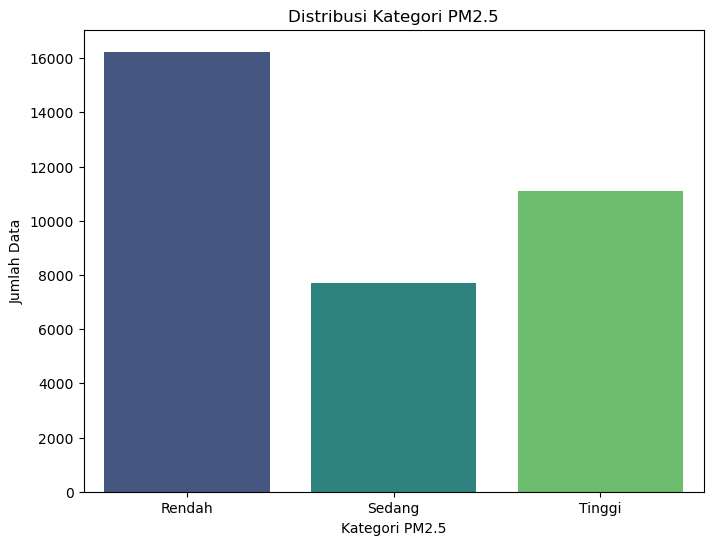

In [89]:
plt.figure(figsize=(8, 6))
sns.barplot(x=pm25_distribution.index, y=pm25_distribution.values, palette='viridis')
plt.title('Distribusi Kategori PM2.5')
plt.xlabel('Kategori PM2.5')
plt.ylabel('Jumlah Data')
plt.show()

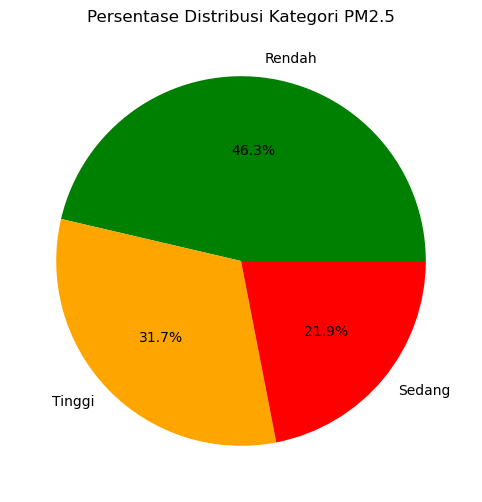

In [91]:
plt.figure(figsize=(8, 6))
pm25_distribution.plot(kind='pie', autopct='%1.1f%%', colors=['green', 'orange', 'red'])
plt.title('Persentase Distribusi Kategori PM2.5')
plt.ylabel('')
plt.show()

In [93]:
yearly_pm25 = df_Dingling.groupby(['year', 'pm25_category']).size().unstack()
print(yearly_pm25)

pm25_category  Rendah  Sedang  Tinggi
year                                 
2013             3240    1723    2381
2014             3769    1815    3168
2015             4195    1974    2573
2016             4275    1961    2546
2017              758     215     441


C:\Users\aryag\AppData\Local\Temp\ipykernel_10884\1428286626.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  yearly_pm25 = df_Dingling.groupby(['year', 'pm25_category']).size().unstack()


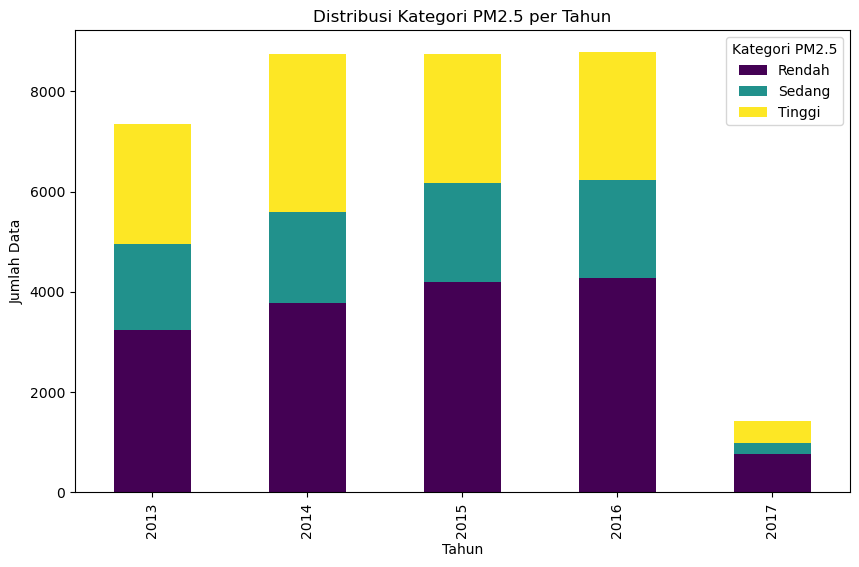

In [95]:
yearly_pm25.plot(kind='bar', stacked=True, figsize=(10, 6), colormap='viridis')
plt.title('Distribusi Kategori PM2.5 per Tahun')
plt.xlabel('Tahun')
plt.ylabel('Jumlah Data')
plt.legend(title='Kategori PM2.5')
plt.show()

In [97]:
def get_season(month):
    if month in [12, 1, 2]:
        return 'Winter'
    elif month in [3, 4, 5]:
        return 'Spring'
    elif month in [6, 7, 8]:
        return 'Summer'
    else:
        return 'Autumn'

df_Dingling['season'] = df_Dingling['month'].apply(get_season)

In [99]:
seasonal_pm25 = df_Dingling.groupby(['season', 'pm25_category']).size().unstack()
print(seasonal_pm25)

pm25_category  Rendah  Sedang  Tinggi
season                               
Autumn           3998    1882    2856
Spring           3662    2260    2910
Summer           4281    2219    2332
Winter           4296    1327    3011


C:\Users\aryag\AppData\Local\Temp\ipykernel_10884\180100621.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  seasonal_pm25 = df_Dingling.groupby(['season', 'pm25_category']).size().unstack()


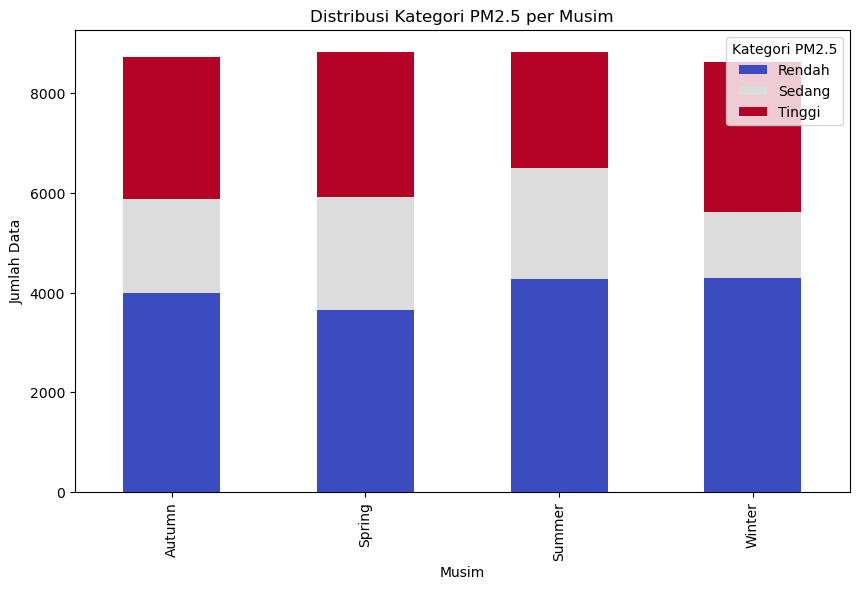

In [101]:
seasonal_pm25.plot(kind='bar', stacked=True, figsize=(10, 6), colormap='coolwarm')
plt.title('Distribusi Kategori PM2.5 per Musim')
plt.xlabel('Musim')
plt.ylabel('Jumlah Data')
plt.legend(title='Kategori PM2.5')
plt.show()

**Insight**
- Polusi udara memiliki variasi temporal dan musiman yang signifikan, dengan musim dingin dan tahun 2014 sebagai periode dengan polusi tertinggi.
- Clustering dengan teknik binning membantu mengidentifikasi pola polusi dan area yang memerlukan perhatian khusus.
- Upaya mitigasi harus difokuskan pada periode dan lokasi dengan polusi tinggi untuk melindungi kesehatan manusia dan lingkungan.

## Conclusion

- Conclution pertanyaan 1:
- Tingkat polusi tertinggi terjadi pada tahun 2014, dengan penurunan bertahap pada 2015 dan 2016, kemudian sedikit meningkat pada 2017.
- Pola musiman menunjukkan bahwa polusi tertinggi terjadi selama musim dingin karena aktivitas pemanasan dan kondisi atmosfer yang stabil.
- Pola harian menunjukkan polusi lebih tinggi selama jam sibuk (pagi dan sore) karena emisi kendaraan yang meningkat.
- Conclution pertanyaan 2:
- Suhu = Tingkat polusi tinggi, terutama PM2.5 dan PM10, menurunkan suhu dengan menghalangi sinar matahari (efek global dimming).
- Curah Hujan = Partikel polusi bertindak sebagai inti kondensasi awan, berpotensi meningkatkan atau mengurangi curah hujan tergantung kondisi atmosfer.
- Tekanan Udara = Polusi secara tidak langsung memengaruhi tekanan udara melalui perubahan suhu dan kelembapan.

In [106]:
df_Dingling.to_csv("df_Dingling", index=False)